In [1]:
from __future__ import annotations
from rich import print
from rich.pretty import pprint
from bitarray import bitarray, frozenbitarray
from sortedcontainers import SortedSet, SortedDict, SortedList
# https://github.com/djbpitt/pyskiplist/tree/dumpNodes
# pip install git+https://github.com/djbpitt/pyskiplist.git@dumpNodes 
from pyskiplist import SkipList
from sparse_set_utils_v2 import SkipDict, NewValueIdEncoder, InvertedValueRange
from statemachine import StateMachine, State
from statemachine.contrib.diagram import DotGraphMachine

enter 'disconnected' from '' given '__initial__'

exit 'disconnected' to 'connecting' given 'connect'

on 'connect' from 'disconnected' to 'connecting'

enter 'connecting' from 'disconnected' given 'connect'

after 'connect' from 'disconnected' to 'connecting'

exit 'connecting' to 'connected' given 'connection_succeed'

on 'connection_succeed' from 'connecting' to 'connected'

enter 'connected' from 'connecting' given 'connection_succeed'

after 'connection_succeed' from 'connecting' to 'connected'

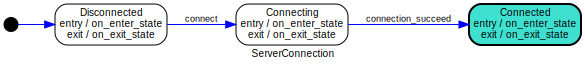

In [4]:
class ServerConnection(StateMachine):
    # states
    disconnected = State(initial=True)
    connecting   = State()
    connected    = State()

    # transitions
    connect            = disconnected.to(connecting, after="connection_succeed")
    connection_succeed = connecting.to(connected)

    def on_connect(self):
        return "on_connect"

    def on_enter_state(self, event: str, state: State, source: State):
        print(f"enter '{state.id}' from '{source.id if source else ''}' given '{event}'")

    def on_exit_state(self, event: str, state: State, target: State):
        print(f"exit '{state.id}' to '{target.id}' given '{event}'")

    def on_transition(self, event: str, source: State, target: State):
        print(f"on '{event}' from '{source.id}' to '{target.id}'")
        return "on_transition"

    def after_transition(self, event: str, source: State, target: State):
        print(f"after '{event}' from '{source.id}' to '{target.id}'")
        return "after_transition"

#graph = DotGraphMachine(ServerConnection)
#dot = graph()
sm = ServerConnection()
sm.connect()
sm

In [2]:
skipped_values = SkipDict()
for v_id, v in enumerate([0, 1, 20, 3, 8, 12]):
    skipped_values.insert(key=v_id, value=v)

inv_range = InvertedValueRange(skipped_values=skipped_values)
pprint(inv_range)
pprint(inv_range.get_remaining_values())

InvertedValueRange(
│   skipped_values=SkipDict(((0, 0), (1, 1), (2, 20), (3, 3), (4, 8), (5, 12))),
│   min_new_values=16,
│   start_range=0,
│   end_range=37,
│   value_range=range(0, 37)
)

{
│   0: 0,
│   1: 2,
│   2: 4,
│   3: 5,
│   4: 6,
│   5: 7,
│   6: 9,
│   7: 10,
│   8: 11,
│   9: 13,
│   10: 14,
│   11: 15,
│   12: 16,
│   13: 17,
│   14: 18,
│   15: 19,
│   16: 21,
│   17: 22,
│   18: 23,
│   19: 24,
│   20: 25,
│   21: 26,
│   22: 27,
│   23: 28,
│   24: 29,
│   25: 30,
│   26: 31,
│   27: 32,
│   28: 33,
│   29: 34,
│   30: 35,
│   31: 36
}

In [2]:
#new_value_encoder = NewValueIdEncoder()
#pprint(new_value_encoder)
#new_value_encoder.register_new_value_id(value_id=1)
#pprint(new_value_encoder)
#new_value_encoder.register_new_value_id(value_id=8)
#pprint(new_value_encoder)
#new_value_encoder.register_new_value_id(value_id=3)
#pprint(new_value_encoder)
#new_value_encoder.update_existing_value_id(value_id=1)
#new_value_encoder.update_existing_value_id(value_id=1)
#pprint(new_value_encoder)

In [1]:
#sl = SkipList()
#sl = SkipDict()
#values = [1, 3, 8, 12]
#for v_id, v in enumerate(values):
#    sl.insert(key=v_id, value=v)
#pprint(sl)
#sl.insert(1, 3)
#pprint(sl)
#sl.insert(21, 81)
#sl.insert(13, 90)
#pprint(sl)
#print(f"sl[ 3 ]               = {sl[3]}")
#print(f"sl.search(key=21)     = {sl.search(key=21)}")
#print(f"sl.index(key=21)      = {sl.index(key=21)}")
#print(f"sl.index(key=13)      = {sl.index(key=13)}")
#print(f"len(sl)               = {len(sl)}")
#print(f"sl.has_index(index=0) = {sl.has_index(index=0)}")
#print(f"sl.has_index(index=6) = {sl.has_index(index=6)}")
##print(f"sl._find_pos(pos=21) = {sl._find_pos(pos=21)}")
#print(f"sl.keys()            = {list(sl.keys())}")
#print(f"sl.values()          = {list(sl.values())}")
##print(f"sl[ 21 ] = {sl[21]}")
#for n in range(0, 14):
#    print(f"({n} in sl) : {(n in sl)}, sl.has_value({n}) : {sl.has_value(n)}, sl.has_key({n}) : {sl.has_key(n)}")
#sl.insert(2, 3)